In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Cost for Train 66.07142857142857
Cost of Test 64.28571428571429
Cost for Train 85.11904761904762
Cost of Test 78.57142857142857
Cost for Train 91.07142857142857
Cost of Test 83.33333333333333
Cost for Train 92.85714285714286
Cost of Test 80.95238095238095
Cost for Train 93.45238095238095
Cost of Test 83.33333333333333
Cost for Train 94.04761904761905
Cost of Test 83.33333333333333
Cost for Train 94.04761904761905
Cost of Test 85.71428571428571
Cost for Train 94.04761904761905
Cost of Test 85.71428571428571
Cost for Train 93.45238095238095
Cost of Test 83.33333333333333
Cost for Train 93.45238095238095
Cost of Test 83.33333333333333
Cost for Train 93.45238095238095
Cost of Test 83.33333333333333
Cost for Train 93.45238095238095
Cost of Test 85.71428571428571
Cost for Train 94.64285714285714
Cost of Test 85.71428571428571
Cost for Train 94.64285714285714
Cost of Test 85.71428571428571
Cost for Train 94.64285714285714
Cost of Test 85.71428571428571
Cost for Train 94.64285714285714
Cost of

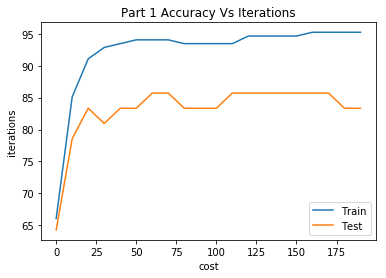

In [44]:
class NeuralNetwork:
    
    def __init__(self,
                num_hidden,
                num_neurons_per_layer,
                activation_func_hidden,
                num_neurons_out_layer=3,
                activation_func_output="softmax",
                opt_algo="SGD",
                loss_func="categorial_cross_entropy_loss",
                learning_rate=0.01,
                num_epochs=200):
        self.num_hidden = num_hidden
        self.num_neurons_per_layer = num_neurons_per_layer
        self.activation_func_hidden = activation_func_hidden
        self.num_neurons_out_layer = num_neurons_out_layer
        self.activation_func_output = activation_func_output
        self.opt_algo = opt_algo
        self.loss_func = loss_func
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
    
    def fit(self):
        self.dataLoader()
        self.train()
    
    def plot(self):
        plt.plot(self.itr, self.train_acc, label="Train")
        plt.plot(self.itr, self.test_acc, label="Test")
        plt.xlabel('cost')
        plt.ylabel('iterations')
        plt.legend()
        plt.title("Part 1 Accuracy Vs Iterations")
        plt.show()
        plt.savefig('../Part1AccuracyVSIterations.png')
        plt.clf()
        
    def train(self):
        weight_l1 = self.weightInitialiser(7, self.num_neurons_per_layer) 
        weight_l2 = self.weightInitialiser(self.num_neurons_per_layer, self.num_neurons_out_layer)
        b1 = np.zeros((self.num_hidden, self.num_neurons_per_layer))
        b2 = np.zeros((self.num_hidden, self.num_neurons_out_layer))
        self.test_acc = []
        self.train_acc= []
        self.itr =[]
        for i in range(self.num_epochs):
            for feature, label in zip(self.train_feat_batch, self.train_label_batch):
                
                z1 = self.forwardProp(weight_l1, feature, b1)
                a1 = self.sig(z1)
                z2 = self.forwardProp(weight_l2, a1, b2)
                a2 = self.softMax(z2)

                delta3 = self.crossEntropy(a2, label)
                dw2 = (a1.T).dot(delta3)
                db2 = np.sum(delta3, axis = 0, keepdims = True)
                delta2 = delta3.dot(weight_l2.T)*(1- np.power(a1, 2))
                dw1= (feature.T).dot(delta2)
                db1 = np.sum(delta2, axis = 0)

                weight_l1 -= self.learning_rate * dw1
                weight_l2 -= self.learning_rate * dw2
                b1 -= self.learning_rate * db1
                b2 -= self.learning_rate * db2

            if(i%10 == 0):
                train_cost = self.trainCost(weight_l1, weight_l2, b1, b2)
                test_cost = self.testCost(weight_l1, weight_l2, b1, b2)
                self.train_acc.append(train_cost)
                self.test_acc.append(test_cost)
                self.itr.append(i);
                print('Cost for Train', train_cost)
                print('Cost of Test', test_cost)

        self.finMod = {'W1': weight_l1, 
                       'B1': b1, 
                       'W2': weight_l2, 
                       'B2': b2}
     
        
    def dataLoader(self):
        """
        Load data and convert into mini batches.
        """
        self.train_data = pd.read_csv('../data/training_data.csv', header=None)
        self.test_data = pd.read_csv('../data/testing_data.csv', header=None)
        
        self.train_data_feats = self.train_data.iloc[:, :-3].to_numpy()
        self.train_data_labels = self.train_data.iloc[:, -3:].to_numpy()
        self.test_data_feats = self.test_data.iloc[:, :-3].to_numpy()
        self.test_data_labels = self.test_data.iloc[:, -3:].to_numpy()
        
        self.train_feat_batch = self.dfSplit(self.train_data_feats)
        self.train_label_batch = self.dfSplit(self.train_data_labels)
        self.test_feat_batch = self.dfSplit(self.test_data_feats)
        self.test_label_batch = self.dfSplit(self.test_data_labels)
    
    def softMax(self, z_mat):
        z_exp = np.exp(z_mat)
        interim_sum = np.sum(z_exp, axis=1, keepdims = True)
        return z_exp / interim_sum
    
    def crossEntropy(self, predicted, real):
        return (predicted-real) / real.shape[0]
    
    def preProcess(self):
        # Already done in preprocessing part and files saved.
        pass
    
    def forwardProp(self, weight_mat, left_out, bias):
        return left_out.dot(weight_mat) + bias
    
    def backwardProp(self, delt_r, weight_mat, act_right):
        return delt_r.dot(weight_mat.T) * (1 - np.power(act_right, 2))
       
    def trainCost(self, w1, w2, b1, b2):
        num = self.train_data_feats.shape[0]
        z1 = self.forwardProp(w1, self.train_data_feats, b1)
        a1 = self.sig(z1)
        z2 = self.forwardProp(w2, a1, b2)
        a2 = self.softMax(z2)
        for i in a2 :
            maxValInd = np.argmax(i)
            i[maxValInd] = 1
            i[(maxValInd+1)%self.num_neurons_out_layer] = 0
            i[(maxValInd+2)%self.num_neurons_out_layer] = 0

        count = 0
        for i in range(a2.shape[0]):
            for j in range(self.num_neurons_out_layer):
                if a2[i][j] != self.train_data_labels[i][j]:
                    break
            else:
                count += 1

        return count*100/a2.shape[0]
    
    def testCost(self, w1, w2, b1, b2):
        num = self.test_data_feats.shape[0]
        z1 = self.forwardProp(w1, self.test_data_feats, b1)
        a1 = self.sig(z1)
        z2 = self.forwardProp(w2, a1, b2)
        a2 = self.softMax(z2)
        for i in a2 :
            maxValInd = np.argmax(i)
            i[maxValInd] = 1
            i[(maxValInd+1)%self.num_neurons_out_layer] = 0
            i[(maxValInd+2)%self.num_neurons_out_layer] = 0

        count = 0
        for i in range(a2.shape[0]):
            for j in range(self.num_neurons_out_layer):
                if a2[i][j] != self.test_data_labels[i][j]:
                    break
            else:
                count += 1

        return count*100/a2.shape[0]
    
    def dfSplit(self, df): 
        df_list = []
        numChunks = len(df) // self.num_neurons_per_layer + 1
        for i in range(numChunks):
            df_list.append(df[i*self.num_neurons_per_layer:(i+1)*self.num_neurons_per_layer])
        return df_list
    
    @staticmethod
    def weightInitialiser(x,y):
        """
        Initialize values in dense layers all between -1 and 1.
        """
        rand_mat = np.random.rand(x,y)
        return 2 * (rand_mat-0.5)
    
    @staticmethod
    def gradSig(x):
        return (1/(1+np.exp(-x))) * (1/(1+np.exp(x-1)))
    
    @staticmethod
    def sig(x):
        return (1/(1+np.exp(-x)))
    
nn = NeuralNetwork(
        num_hidden = 1,
        num_neurons_per_layer = 32,
        activation_func_hidden = 'sigmoid',
        num_neurons_out_layer=3,
        activation_func_output="softmax",
        opt_algo="SGD",
        loss_func="categorial_cross_entropy_loss",
        learning_rate=0.01,
        num_epochs=200)

nn.fit()
nn.plot()